<a href="https://colab.research.google.com/github/anandravisiji/m_projs6cs2/blob/main/carEfficiencyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install numpy pandas scikit-learn


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

url = "/content/car_data.csv"
df = pd.read_csv(url, na_values="?")

print("Columns in dataset:", df.columns)


features = ["cylinders", "displacement", "highway_mpg", "city_mpg", "year"]
df = df[features + ["combination_mpg"]]


df = df.apply(pd.to_numeric, errors="coerce")


print("Missing values before filling:\n", df.isnull().sum())


df.fillna(df.mean(), inplace=True)

print("Missing values after filling:\n", df.isnull().sum())


X = df[features].values
y = (df["combination_mpg"] > 23).astype(int)


scaler = MinMaxScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Columns in dataset: Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')
Missing values before filling:
 cylinders          2
displacement       2
highway_mpg        0
city_mpg           0
year               0
combination_mpg    0
dtype: int64
Missing values after filling:
 cylinders          0
displacement       0
highway_mpg        0
city_mpg           0
year               0
combination_mpg    0
dtype: int64
Training samples: 440, Testing samples: 110


In [27]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
    def activation(self, x):
        """Step function (Activation)"""
        return 1 if x >= 0 else 0

    def predict(self, X):
        """Make predictions for each sample in X"""
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

    def train(self, X_train, y_train):
        """Train the perceptron"""
        for epoch in range(self.epochs):
            total_errors = 0
            for i in range(len(X_train)):
                y_pred = self.activation(np.dot(X_train[i], self.weights) + self.bias)
                error = y_train[i] - y_pred
                if error != 0:
                    self.weights += self.learning_rate * error * X_train[i]
                    self.bias += self.learning_rate * error
                    total_errors += 1

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Errors: {total_errors}")

        print("Training complete!")


y_train = np.array(y_train)
y_test = np.array(y_test)

perceptron = Perceptron(input_size=X_train.shape[1], learning_rate=0.01, epochs=100)
perceptron.train(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")



Epoch 0, Errors: 239
Epoch 10, Errors: 30
Epoch 20, Errors: 26
Epoch 30, Errors: 24
Epoch 40, Errors: 28
Epoch 50, Errors: 25
Epoch 60, Errors: 28
Epoch 70, Errors: 18
Epoch 80, Errors: 24
Epoch 90, Errors: 14
Training complete!
Perceptron Accuracy: 98.18%


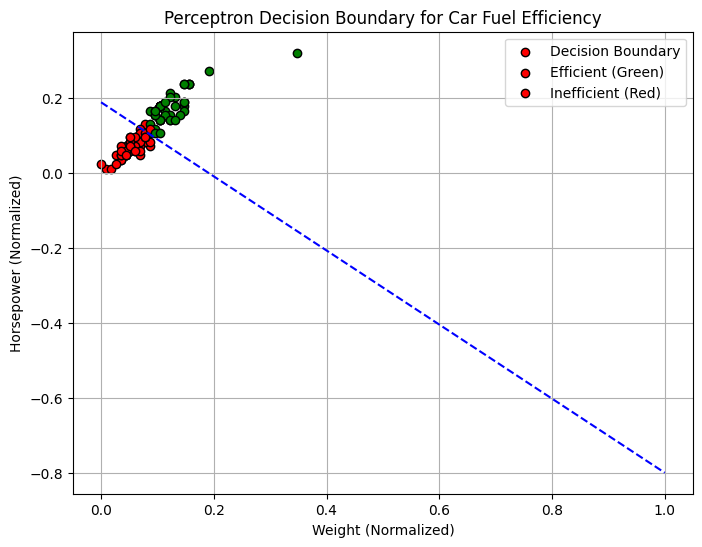

In [28]:
import matplotlib.pyplot as plt


feature_1 = 3
feature_2 = 2


plt.figure(figsize=(8, 6))
for i in range(len(X_test)):
    color = 'green' if y_test[i] == 1 else 'red'
    plt.scatter(X_test[i, feature_1], X_test[i, feature_2], color=color, edgecolors='k')


x_vals = np.linspace(0, 1, 100)
y_vals = (-perceptron.weights[feature_1] * x_vals - perceptron.bias) / perceptron.weights[feature_2]

plt.plot(x_vals, y_vals, color='blue', linestyle='dashed', label="Decision Boundary")


plt.xlabel("Weight (Normalized)")
plt.ylabel("Horsepower (Normalized)")
plt.title("Perceptron Decision Boundary for Car Fuel Efficiency")
plt.legend(["Decision Boundary", "Efficient (Green)", "Inefficient (Red)"])
plt.grid(True)
plt.show()


Unique labels in y_test: [0 1]
Unique labels in y_pred: [0 1]


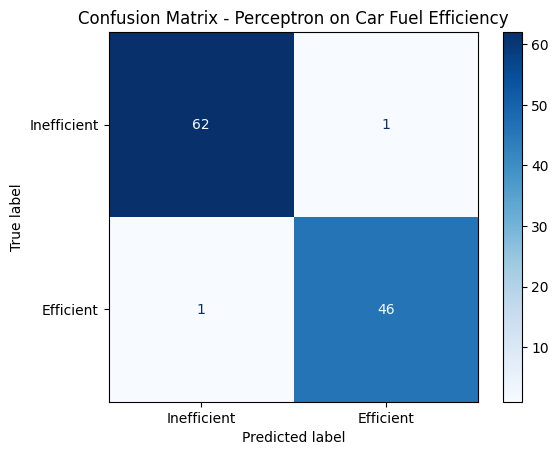

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))
def predict(self, X):
    """Make predictions for each sample in X"""
    linear_output = np.dot(X, self.weights) + self.bias
    predictions = np.array([self.activation(x) for x in linear_output])
    print("Unique predictions:", np.unique(predictions))
    return predictions
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Inefficient", "Efficient"])
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix - Perceptron on Car Fuel Efficiency")
plt.show()
